# Soil Respiration Rate

Soil respiration was measured in an agricultural field at the Konza prairie during the fallow period using the EGM-5 portable CO$_2$ gas analyzer from PP Systems. Filtering the sensor signal is the first step to quantifying the soil respiration rate $\frac{dC}{dT}$, which is then used to compute the soil CO$_2$ efflux:

$$ F_{co2} = \frac{dC}{dT} \frac{\mu mol}{mol \ s} \frac{P}{1013} \frac{273}{273+T_{air}} \frac{1 \ mol}{22.4 \ L} \frac{V}{A} \frac{10^3 L}{m^3}$$

where,

$F_{co2}$ is the soil carbon dioxide flux in $\mu mol \ m^{-2} \ s^{-1}$

$\frac{dC}{dT}$ is the respiration rate, the slope of our measurement curve

$P$ is the atmospheric pressure in millibars

$T_air$ is air air temperature in degrees Celsius

$V$ is the volume of the chamber in $m^3$

$A$ is the area of the chamber in $m^2$


In [42]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt


In [58]:
# Define chamber volume 
V = 1171 # in ml
V = V/1000 # in Liters

# Define chamber area
A = 78 # in cm2 
A = 78/10000 # in m^2

# Set window for estimating soil respiration rate
# Somewhat arbitrary, discarded first and last minute
start_range = 60
end_range = 150


In [59]:
df = pd.read_csv('../datasets/soil_co2_efflux_konza.csv')
df.head()


,Date,Time,CO2,Tair,Pressure,dC,dt,SRL,SRQ
0,23/08/19,14:16:24,384,25.5,987.0,0,1,0.0,0.0
1,23/08/19,14:16:25,384,25.5,987.0,0,2,0.0,0.0
2,23/08/19,14:16:26,384,25.5,987.0,1,3,0.0,0.0
3,23/08/19,14:16:27,385,25.5,987.0,1,4,0.0,0.0
4,23/08/19,14:16:28,385,25.5,987.0,2,5,0.0,0.0


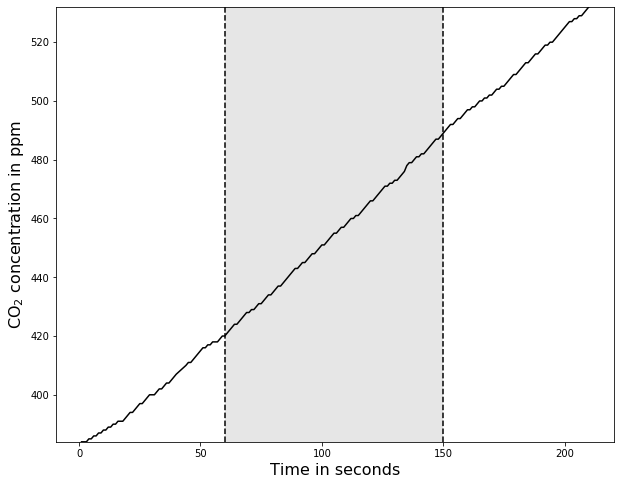

In [60]:
plt.figure(figsize=(10,8))
plt.plot(df["dt"], df["CO2"], '-k')
plt.xlabel('Time in seconds', size=16)
plt.ylabel('CO$_2$ concentration in ppm', size=16)
plt.axvline(start_range, linestyle='--', color='k')
plt.axvline(end_range, linestyle='--', color='k')
plt.ylim(df["CO2"].min(), df["CO2"].max())
plt.fill_betweenx(df["CO2"], 60, 150, facecolor=[0.9,0.9,0.9])
plt.show()


The shaded area between the dashed lines represents the portion of our measurements that we will consider for estimating the soil respiration rate.


In [61]:
# Compute the soil respiration rate 
Co = df.loc[start_range,"CO2"]
Cn = df.loc[end_range,"CO2"]
dC = Cn - Co
dt = end_range - start_range

print(dC/dt) # From selected range
print(df.loc[13:,"SRL"].mean()) # Estimated by sensor
print((df["CO2"].max() - df["CO2"].min())/df.shape[0]) # Based on all observations.


0.7555555555555555
0.6640804123711344
0.714975845410628


The different methods for estimating the soil repiration rate are slightly different but consistent. The computation of the soil respiration rate using the central portion of the data does not seem to show an advantage in this particular case, but it might be a more robust approach in chambers that exhibit leakage, particularly at high carbon dioxide concentrations.


In [65]:
# Compute average air pressure during window
P = df.loc[start_range:end_range,"Pressure"].mean() 

# Compute average air temperature during window
Tair =  df.loc[start_range:end_range,"Tair"].mean()

# Compute the soil CO2 efflux
F = dC/dt * P/1013 * 273/(273+Tair) * 1/22.4 * V/A * 1000
print("Soil CO_2 efflux is:", round(F,1), " micromols per m^2 per second")


Soil CO_2 efflux is: 4475.1  micromols per m^2 per second


## References

Parkinson, K.J., 1981. An improved method for measuring soil respiration in the field. Journal of applied ecology, pp.221-228.

PPSytems, 2018. EGM-5 Portable CO2 Gas Analyzer Operation Manual version 1.06.
